In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class Bandit:
    def __init__(self,m,name):
        self.m = m
        self.N = 1
        self.mean = 0.0
        self.name = name
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self,x):
        self.N += 1 
        self.mean = (1-1.0/self.N)*self.mean + (1.0/self.N)*x  

In [11]:
def run_exp(m1_mean,m2_mean,m3_mean,eplsilon,N):
    
    #Create Bandits with given mean
    m1 = Bandit(m1_mean,"m1")
    m2 = Bandit(m2_mean,"m2")
    m3 = Bandit(m3_mean,"m3")
    
    bandits = [m1,m2,m3]
    data = np.empty(N)
    cum_reward = 0.0 
    for i in range(N):
        if np.random.randn() < eplsilon:
            # Chose randonly
            idx = np.random.randint(0,3)            
        else:    
            #Chose the one that has max reward but considering the upper bound
            N_Total = np.sum([b.N for b in bandits])
            idx = np.argmax([(b.mean + np.sqrt(2*np.log(N_Total)/b.N)) for b in bandits])
        
        reward = bandits[idx].pull()
        bandits[idx].update(reward)
        data[i] = reward
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1_mean)
    plt.plot(np.ones(N)*m2_mean)
    plt.plot(np.ones(N)*m3_mean)
    plt.xscale('log')
    plt.show()
    for b in bandits:
        print(b.name, b.mean)

    return cumulative_average

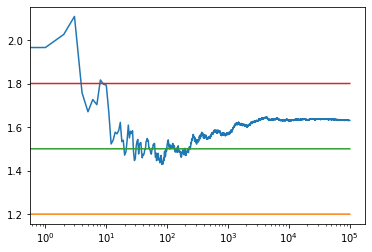

m1 1.1910247056319418
m2 1.4861805611143497
m3 1.7954179201214018


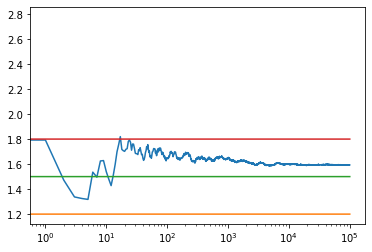

m1 1.201503339039153
m2 1.5025233618236458
m3 1.8018015189412924


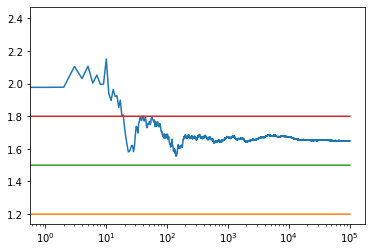

m1 1.2097562042130046
m2 1.49542413928319
m3 1.8003854704712527


C:\Users\aanishsingla\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


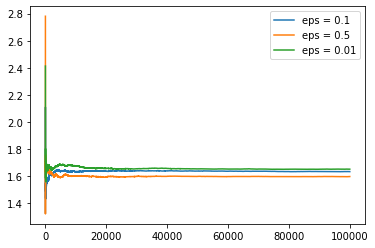

In [12]:
if __name__ == '__main__':
    c_1 = run_exp(1.2, 1.5, 1.8, 0.1, 100000)
    c_05 = run_exp(1.2, 1.5, 1.8, 0.5, 100000)
    c_01 = run_exp(1.2, 1.5, 1.8, 0.01, 100000)
    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.5')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.show()